# Lista de Exercícios \#1
### Breno Vieira Arosa

### Questão 1

### 1.a)

\begin{equation}
\int_{0}^{1} x e^{-x}dx = \left[-x e^{-x}\right]_{0}^{1} - \int_{0}^{1} -e^{-x}dx
\end{equation}

\begin{equation}
\int_{0}^{1} x e^{-x}dx = -\frac{1}{e} + \left[-e^{-x}\right]_{0}^{1}
\end{equation}

\begin{equation}
\int_{0}^{1} x e^{-x}dx = -\frac{1}{e} + (-\frac{1}{e} + 1) = \frac{e - 2}{e}
\end{equation}

\begin{equation}
\frac{e - 2}{e} \approx 0.26424111765711533
\end{equation}

### 1.b)

In [1]:
import numpy as np
import scipy.stats as stats
np.random.seed(7)

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML
import matplotlib.patheffects as pe

import warnings
warnings.filterwarnings('ignore')

In [2]:
def calc_func(x):
    return x * np.exp(-x)

In [3]:
# seleciona 10 valores de entradas aleatorios de distribuição uniforme entre 0 e 1
x = np.random.uniform(low=0., high=1., size=10)

In [4]:
# tira a media da função para os valores correspondentes as entradas, calculando assim a integral
integral = calc_func(x).mean()

In [5]:
print(f"Monte Carlo com 10 pontos de distribuição uniforme:\n{integral}")

Monte Carlo com 10 pontos de distribuição uniforme:
0.26231681183154487


### 1.c)

In [6]:
# seleciona 10 valores de entradas aleatorios de distribuição exponencial limitada entre 0 e 1
x = stats.truncexpon(b=1, loc=0, scale=1).rvs(size=10)

In [7]:
# tira a media da função para os valores correspondentes as entradas, calculando assim a integral
integral = calc_func(x).mean()

In [8]:
print(f"Monte Carlo com 10 pontos de distribuição exponecial:\n{integral}")

Monte Carlo com 10 pontos de distribuição exponecial:
0.21939176126320875


### Questão 2

Será obtido a aproximação por Monte Carlo do valor de $\pi$ a partir do calculo dá área de um círculo de raio $1$.

In [9]:
def inside_unit_circle(x1, x2):
    return np.sqrt(x1**2 + x2**2) <= 1

### 2.a)

In [10]:
# quantidade de pontos amostrada
N = 20

In [11]:
# seleciona N valores de entradas aleatorios de distribuição uniforme entre -1 e 1
x1 = np.random.uniform(low=-1., high=1., size=N)
x2 = np.random.uniform(low=-1., high=1., size=N)

In [12]:
# area do quadrado * numero de vezes que o ponto caiu dentro do circulo / numero de pontos 
pi_aprox = 4 * inside_unit_circle(x1, x2).sum() / N

In [13]:
print(f"Aproximação de pi por Monte Carlo com {N} pontos:\n{pi_aprox}")

Aproximação de pi por Monte Carlo com 20 pontos:
3.8


### 2.b)

In [14]:
# quantidade de pontos amostrada
N = 10000000

In [15]:
# seleciona N valores de entradas aleatorios de distribuição uniforme entre -1 e 1
x1 = np.random.uniform(low=-1., high=1., size=N)
x2 = np.random.uniform(low=-1., high=1., size=N)

In [16]:
# area do quadrado * numero de vezes que o ponto caiu dentro do circulo / numero de pontos 
pi_aprox = 4 * inside_unit_circle(x1, x2).sum() / N

In [17]:
print(f"Aproximação de pi por Monte Carlo com {N} pontos:\n{pi_aprox}")

Aproximação de pi por Monte Carlo com 10000000 pontos:
3.1411


Observamos que podemos alcançar uma aproximação de $\pi$ tão boa quanto desejado apenas variando o número de pontos.

### Questão 3

In [18]:
def J(x):
    return x**2

In [19]:
eps = 0.1
temp = 0.1
x0 = 42

### 3.a)

In [20]:
def boltzmann_sampler(J, N, temp, eps, x0):
    """
    J: função custo utilizada
    N: número de iterações
    temp: temperatura
    eps: epsilon
    x0: estado inicial
    """
    x = np.zeros(N)
    x[0] = x0
    
    for i in range(N-1):
        x_candidate = x[i] + eps * np.random.uniform(low=-1., high=1.)
        delta_J = J(x_candidate) - J(x[i])
        
        q = np.exp(-delta_J/temp)
        r = np.random.uniform(low=0., high=1.)
        
        if r < q:
            x[i+1] = x_candidate
        else:
            x[i+1] = x[i]
            
    return x

In [21]:
x = boltzmann_sampler(J, 100000, temp, eps, x0)

Plottando as distribuições dos primeiros e dos ultimos valores de x para verificar em qual pdf o algoritmo convergiu.

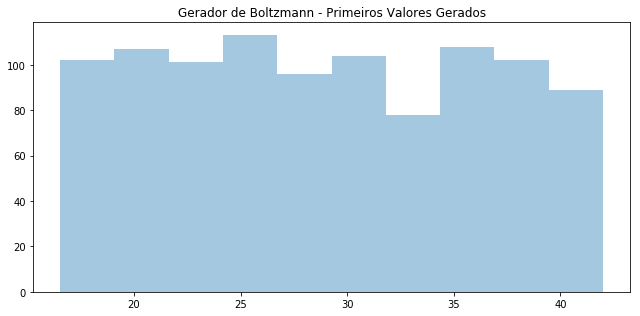

In [22]:
plt.figure(figsize=(9, 4.5))
sns.distplot(x[0:1000], bins=None, kde=False)
plt.title("Gerador de Boltzmann - Primeiros Valores Gerados")
plt.tight_layout()
plt.show()

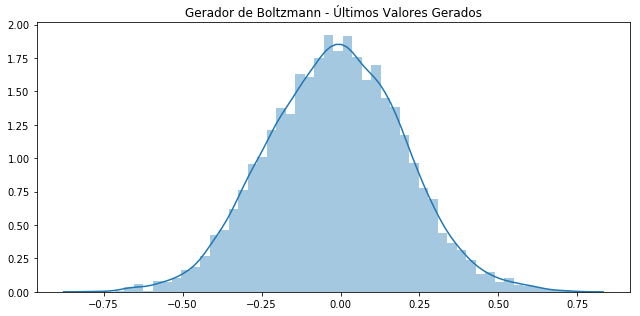

In [23]:
plt.figure(figsize=(9, 4.5))
sns.distplot(x[-10000:], bins=None, kde=True)
plt.title("Gerador de Boltzmann - Últimos Valores Gerados")
plt.tight_layout()
plt.show()

### Questão 4

In [24]:
def J(x):
    return -x + 100 * ((x - 0.2) ** 2) * ((x - 0.8) ** 2)

In [25]:
eps = 0.01
initial_temp = 1
x0 = 0

### 4.a)

In [26]:
def simulated_anneling(J, N, initial_temp, eps, x0):
    """
    J: função custo utilizada
    N: número de iterações
    initial_temp: temperatura inicial
    eps: epsilon
    x0: estado inicial
    """
    
    x = np.zeros(N, dtype=float)
    x[0] = x0
    
    temp = initial_temp
    k = 1
    iter_per_temp = int(N / 8) # 8 trocas de temperatura durante o treinamento
    
    for i in range(N-1):
        # R -> distribuição normal com média 0 e variancia 1
        x_candidate = x[i] + eps * np.random.normal(loc=0., scale=1.)
        delta_J = J(x_candidate) - J(x[i])
        
        q = np.exp(-delta_J/temp)
        r = np.random.uniform(low=0., high=1.)
        
        if r < q:
            x[i+1] = x_candidate
        else:
            x[i+1] = x[i]
            
        if (i != 0) and (i % iter_per_temp) == 0:
            k = k + 1
            temp = initial_temp / np.log2(1+k)

    return x

In [27]:
x = simulated_anneling(J, 1000000, initial_temp, eps, x0)

Plottando as distribuições dos primeiros e dos ultimos valores de x para verificar em qual pdf o algoritmo convergiu.

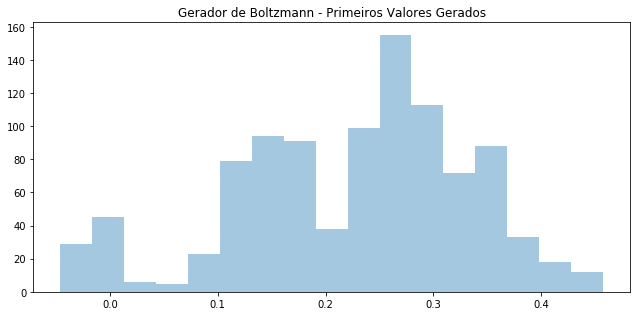

In [28]:
plt.figure(figsize=(9, 4.5))
sns.distplot(x[0:1000], bins=None, kde=False)
plt.title("Gerador de Boltzmann - Primeiros Valores Gerados")
plt.tight_layout()
plt.show()

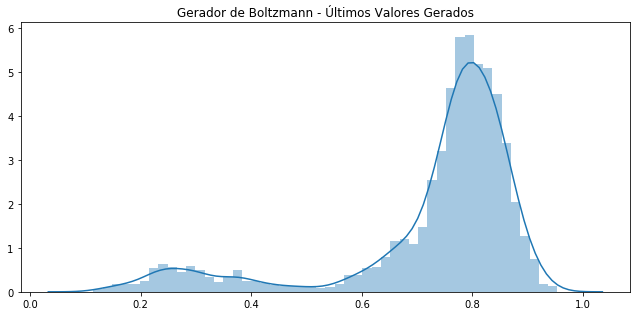

In [29]:
plt.figure(figsize=(9, 4.5))
sns.distplot(x[-10000:], bins=None, kde=True)
plt.title("Gerador de Boltzmann - Últimos Valores Gerados")
plt.tight_layout()
plt.show()

### Questão 5

In [30]:
def J(x, y):
    # Função de Rosenbrock
    # https://en.wikipedia.org/wiki/Rosenbrock_function
    # minimo em (1, 1)
    return (100 * (y - x**2)**2) + (x - 1)**2

In [40]:
def simulated_anneling(J, N, initial_temp, eps, x0):
    """
    J: função custo utilizada
    N: número de iterações
    initial_temp: temperatura inicial
    eps: epsilon
    x0: estado inicial
    """
    X = np.zeros((N, x0.shape[1]), dtype=float)
    X[0, :] = x0
    
    temp = initial_temp
    k = 1
    iter_per_temp = int(N / 8) # 8 trocas de temperatura durante o treinamento
    
    for i in range(N-1):
        x_candidate = X[i, :] + eps * np.random.uniform(low=-1., high=1., size=x0.shape[1])
        delta_J = J(*x_candidate) - J(*X[i, :])
        
        q = np.exp(-delta_J/temp)        
        r = np.random.uniform(low=0., high=1.)
        
        if r < q:
            X[i+1] = x_candidate
        else:
            X[i+1] = X[i]
            
        if (i != 0) and (i % iter_per_temp) == 0:
            k = k + 1
            temp = initial_temp / np.log2(1+k)

    return X

In [41]:
eps = 0.1
initial_temp = .001
x0 = np.array([-0.5, 2.8]).reshape((1, 2))
N = 100000

In [42]:
X = simulated_anneling(J, N, initial_temp, eps, x0)

In [ ]:
# plot da funcao custo
path = X[np.logspace(0.1, np.log10(N), num=100).astype(int) - 1].T

xmin, xmax, xstep = -2, 2, .03
ymin, ymax, ystep = -1, 3, .03

y, x = np.mgrid[slice(ymin, ymax + ystep, ystep),
                slice(xmin, xmax + xstep, xstep)]
z = J(x,y)
z = z[:-1, :-1]

fig = plt.figure(figsize=(9, 8))
ax = plt.axes(projection='3d', elev=45, azim=120)

ax.plot_surface(x, y, J(x, y), norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.9, cmap=plt.cm.jet)

line, = ax.plot([], [], [], c='w', lw=2,
                path_effects=[pe.Stroke(linewidth=5, foreground='#000000'), pe.Normal()])
point, = ax.plot([], [], [], 'o', c="w", label='Simulated Anneling',
                 path_effects=[pe.Stroke(linewidth=5, foreground='#000000'), pe.Normal()])

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$Custo$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
ax.legend()

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

def animate(i):
    line.set_data(path[0,:i], path[1,:i])
    line.set_3d_properties(J(*path[::,:i]))
    point.set_data(path[0,i-1:i], path[1,i-1:i])
    point.set_3d_properties(J(*path[::,i-1:i]))
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=200, 
                               repeat=True, repeat_delay=1000, blit=True)

In [35]:
HTML(anim.to_html5_video())